<a href="https://colab.research.google.com/github/dilthoms/ai-ml-assignments/blob/master/kaggle/kaggle-digits/kaggle-digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup kaggle cli and download dataset in google colab

Since all data is lost when google colab session ends, the six steps given below will download dataset from kaggle and save you from the trouble of downloading the dataset everytime. The first two steps below have to be done manually the first time. After that the rest of the steps can be executed by running the three cells (steps 3-6) below. You have to run these three cells to download the dataset everytime you start a new session. 
  

1. Download / create json credentials after creating an account in kaggle.  See https://github.com/Kaggle/kaggle-api for more details
2. Upload the kaggle.json file to your google drive
3. Run the script in the first cell below to download kaggle.json  to your colab environment
4. It will ask you to click on a link and enter the verification code
5. Install kaggle cli using pip install
6. Download the dataset




In [5]:
# Code from https://medium.com/@move37timm/using-kaggle-api-for-google-colaboratory-d18645f93648
# Create kaggle.json by following instructions at https://github.com/Kaggle/kaggle-api
# Upload kaggle.json to google drive
# Download kaggle.json to colab from the users google drive

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"
if not os.path.exists(os.path.dirname(filename)):
  os.makedirs(os.path.dirname(filename))
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [6]:
# Install kaggle cli
!pip install kaggle

In [7]:
# Download the dataset for digit-recognizer chalenge
!kaggle competitions download -c digit-recognizer

 55% 5.00M/9.16M [00:00<00:00, 34.6MB/s]
100% 9.16M/9.16M [00:00<00:00, 44.8MB/s]
 82% 5.00M/6.09M [00:00<00:00, 32.7MB/s]
100% 6.09M/6.09M [00:00<00:00, 29.8MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 65.6MB/s]


# 2. Read data in pandas dataframe
1. Check train and test csv files have been downloaded
2. import pandas and numpy and create train and test dataframes from the respective csv files
3. Inspect the dataframes
4. Convert to numpy arrays for train, validation, and test set 

In [8]:
# Check train and test csv files exist
!ls -ltr
!unzip train.csv.zip
!unzip test.csv.zip

total 15864
drwxr-xr-x 1 root root    4096 Dec 18 16:52 sample_data
-rw-r--r-- 1 root root    2608 Jan 12 15:48 adc.json
-rw-r--r-- 1 root root 9606023 Jan 12 15:48 train.csv.zip
-rw-r--r-- 1 root root 6385593 Jan 12 15:48 test.csv.zip
-rw-r--r-- 1 root root  240909 Jan 12 15:48 sample_submission.csv
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [0]:
# Read the csv files using pandas
import pandas as pd
import numpy as np
df_tr = pd.read_csv('train.csv')
df_te = pd.read_csv('test.csv')


In [10]:
# Examine the contents of train.csv
# Contains 28x28 pixel values and the corresponding digit label
print (df_tr.info())
df_tr.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Examine the contents of test.csv
# Contains only the 28x28 pixel values without the corresponding digit label
print (df_te.info())
df_te.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Partition the training data into pixels (independent variable) and label (dependent variable)
X = np.asarray(df_tr.drop('label',axis=1),dtype=np.uint8).reshape(-1,28,28)
yhat = np.asarray(df_tr['label'])

np.random.seed(2)
# Generate random indices for creating a random validation set with 20% of the labelled data
validx = (np.random.uniform(size=len(X)) <= 0.2)

# Create training set (80% of the labelled data)
X_trn = X[~validx]
y_trn = yhat[~validx]

# Create validation set (20% of the labelled data)
X_val = X[validx]
y_val = yhat[validx]

# Create the test set
X_tes = np.asarray(df_te,dtype=np.uint8).reshape(-1,28,28)

# 3. Visualize some of the data items
1. import matplotlib
2. Visualize the first few data items and verify the corresponding labels match

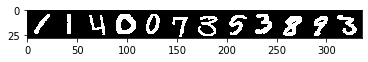

array([1, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 3])

In [100]:
# Concatenate nvis images horizontally and visualize it using matplot lib
import matplotlib.pyplot as plt
nvis = 12
plt.imshow(np.concatenate(X_trn[:nvis],axis=1),cmap='gray',vmin=0,vmax=1)
plt.show()

# Print the corresponding labels to check they match
y_trn[:nvis]

# 4a. Create a fully connected neural network in pytorch

We follow the same steps as in [assignment 4](https://github.com/dilthoms/ai-ml-assignments/blob/master/AI-ML-Libs/sklearn-pytorch.ipynb)

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
    
# Create a class and define the layers in the __init__
# and implement the forward propagation. Pytorch will automatically
# calculate the backward propagation for you. 

class SingleHidden_NN(nn.Module):
    '''
    A Neural Network with a single hidden layer.
    ''' 
    
    # Create a constructor and define the layers and activations
    def __init__(self, input_size,hidden_size,output_size):
        '''
        Arguments:
            input_size  : The number of neurons in the input layer
            hidden_size : The number of neurons in the hidden layer
            output_size : The number of neurons in the output layer
        '''
        super(SingleHidden_NN, self).__init__()
        self.input_size = input_size
        self.layernorm1 = nn.LayerNorm(input_size)
        # Define a pytorch linear layer that connects the input layer to the hidden layer
        self.layer1 = nn.Linear(input_size, hidden_size)
        # Define a pytorch linear layer that connects the hidden layer to the output layer
        self.layernorm2 = nn.LayerNorm(hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        

         
    def forward(self, x):
      '''
      Implement forward propagation with relu activation for the hidden layer.
      Arguments:
          x      : The input x
      Returns:
          output : The linear activation from the output layer
      '''
      output = self.layer2(self.layernorm2(F.relu(self.layer1(self.layernorm1(x.view(-1,self.input_size))))))
      return output

# 4b. Create a convolutional neural network in pytorch


In [0]:

class ConvNN(nn.Module):
    def __init__(self):
      super(ConvNN, self).__init__()
      self.conv0_bn = nn.BatchNorm2d(1)
      self.conv1 = nn.Conv2d(1,64,3,padding=1)
      self.conv11 = nn.Conv2d(64,64,3,padding=1)
      self.conv1_bn = nn.BatchNorm2d(64)
      self.conv11_bn = nn.BatchNorm2d(64)
      self.conv1l_bn = nn.BatchNorm2d(64)
      self.conv2 = nn.Conv2d(64,128,3,padding=1)
      self.conv22 = nn.Conv2d(128,128,3,padding=1)
      self.conv2_bn = nn.BatchNorm2d(128)
      self.conv22_bn = nn.BatchNorm2d(128)
      self.conv2l_bn = nn.BatchNorm2d(128)
      self.conv3 = nn.Conv2d(128,256,3,padding=1)
      self.conv33 = nn.Conv2d(256,256,3,padding=1)
      self.conv3_bn = nn.BatchNorm2d(256)
      self.conv33_bn = nn.BatchNorm2d(256)
      self.conv3l_bn = nn.BatchNorm2d(256)
      self.locpool1 = nn.Conv2d(64,64,2,2,padding=0)
      self.locpool2 = nn.Conv2d(128,128,2,2,padding=0)
      self.locpool3 = nn.Conv2d(256,256,2,2,padding=0)
      self.glopool = nn.AdaptiveMaxPool2d((1,1))
      self.dropout = nn.Dropout(0.5)
      self.layernorm1 = nn.LayerNorm(2048)
      self.lin1 = nn.Linear(256,256)
      self.layernorm2 = nn.LayerNorm(256)
      self.lin2 = nn.Linear(256,10)
      
    def forward(self,x):
      #print(x.shape)
      #x = x.permute(0,3,2,1)
      x = self.conv1_bn(F.relu(self.conv1((x))))
      x = self.conv11_bn(F.relu(self.conv11((x))))
      x = self.conv1l_bn(F.relu(self.locpool1(x)))
      x = self.conv2_bn(F.relu(self.conv2(x)))
      x = self.conv22_bn(F.relu(self.conv22(x)))
      x = self.conv2l_bn(F.relu(self.locpool2(x)))
      x = self.conv3_bn(F.relu(self.conv3(x)))
      x = self.conv33_bn(F.relu(self.conv33(x)))
      x = self.conv3l_bn(F.relu(self.locpool3(x)))
      x = F.adaptive_avg_pool2d(x,(1,1))
      x = x.view(x.size(0),-1)
      x = F.relu(self.lin1(self.dropout(((x)))))
      x = self.lin2(self.dropout(((x))))
      return x


In [0]:
# Create a Dataset subclass for loading datasets in numpy arrays
# See https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#dataset-class

from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
import PIL 
import numpy as np
class Numpy_XY_Dataset(Dataset):
  '''
  Dataset subclass for the MNIST digits dataset
  '''
  
  def __init__(self,X,y,train=True):
    '''
    Create the independent and dependent variables
    '''
    super(Numpy_XY_Dataset,self).__init__()
    self.X = X
    self.y = y
    assert(len(X)==len(y))
    self.train = train
    self.trtsfm = transforms.Compose([transforms.RandomAffine(degrees=5,shear=5,scale=(0.95,1.05)),transforms.ToTensor(),transforms.RandomErasing()])
    self.tetsfm = transforms.Compose([transforms.ToTensor()])
    
  def __len__(self):
    '''
    Return the size of the dataset
    '''
    return len(self.X)
  
  def __getitem__(self,idx):
    '''
    Return the data item at index idx
    '''
    if self.train:
      return self.trtsfm(PIL.Image.fromarray(self.X[idx])),self.y[idx]
      #return self.X[idx],self.y[idx]
    else:
      return self.tetsfm(PIL.Image.fromarray(self.X[idx])),self.y[idx]
        

In [0]:
# Write training loop
import torch.optim as optim
num_epochs = 50
model = ConvNN().cuda()
lossFunction = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer,step_size=15)
ds_trn = Numpy_XY_Dataset(X_trn,y_trn,train=True)
ds_val = Numpy_XY_Dataset(X_val,y_val,train=False)

dl_trn = DataLoader(dataset=ds_trn,batch_size=256,shuffle=True)
dl_val = DataLoader(dataset=ds_val,batch_size=256,shuffle=False)

# Write the training loop
best = 0
for epoch in range(num_epochs):
  scheduler.step()
  model.train(True) 
  for imgs,labels in dl_trn:
    imgs,labels = imgs.cuda(),labels.cuda()
    # Calculate the activations for the training set using forward propagation
    out = model(imgs)
    
    # Calculate the value of loss using the output of the forward propagation and the 
    # ground truth for the training set
    loss = lossFunction(out,labels)
    
    # Reset the gradients to zero
    optimizer.zero_grad()
    
    # Run the backward propagation and update the parameters by one step
    loss.backward()
    optimizer.step()
    
  model.train(False)
  correct = 0
  for imgs,labels in dl_val:
    imgs,labels = imgs.cuda(),labels.cuda()
    out = model(imgs)
    valloss = lossFunction(out,labels)
    _,out = torch.max(out,1)
    correct += torch.sum(out == labels.data)
  acc =  correct.float()/len(ds_val)
  if acc > best:
    best = acc
    torch.save(model.state_dict(),"digit-"+str(np.round(acc.cpu().numpy(),decimals=5))+".pth")
  print('Epoch [{}/{}], Train loss: {:.4f}' .format(epoch, num_epochs, loss.item()))
  print('Epoch [{}/{}], Val loss: {:.4f} and acc: {:.4f}' .format(epoch, num_epochs, valloss, acc))

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Epoch [0/50], Train loss: 0.3818
Epoch [0/50], Val loss: 0.2541 and acc: 0.9571
Epoch [1/50], Train loss: 0.3641
Epoch [1/50], Val loss: 0.1572 and acc: 0.9687
Epoch [2/50], Train loss: 0.2409
Epoch [2/50], Val loss: 0.0781 and acc: 0.9783
Epoch [3/50], Train loss: 0.2503
Epoch [3/50], Val loss: 0.0521 and acc: 0.9830
Epoch [4/50], Train loss: 0.0270
Epoch [4/50], Val loss: 0.0742 and acc: 0.9850
Epoch [5/50], Train loss: 0.0617
Epoch [5/50], Val loss: 0.0799 and acc: 0.9888
Epoch [6/50], Train loss: 0.0903
Epoch [6/50], Val loss: 0.0586 and acc: 0.9896
Epoch [7/50], Train loss: 0.0393
Epoch [7/50], Val loss: 0.0922 and acc: 0.9911
Epoch [8/50], Train loss: 0.1229
Epoch [8/50], Val loss: 0.2330 and acc: 0.9293
Epoch [9/50], Train loss: 0.1678
Epoch [9/50], Val loss: 0.0968 and acc: 0.9899
Epoch [10/50], Train loss: 0.2778
Epoch [10/50], Val loss: 0.0431 and acc: 0.9875
Epoch [11/50], Train loss: 0.2025
Epoch [11/50], Val loss: 0.0587 and acc: 0.9896
Epoch [12/50], Train loss: 0.0681
Ep

In [114]:
# Generate predictions using the trained model
# A hack for dataloader for X_tes by passing zeros as labels

ds_tes = Numpy_XY_Dataset(X_tes,np.zeros(len(X_tes)),train=False)
dl_tes = DataLoader(dataset=ds_tes,batch_size=256,shuffle=False)
res = []
for imgs,labels in dl_tes:
    imgs,labels = imgs.cuda(),labels.cuda()
    out = model(imgs)
    _,out = torch.max(out,1)
    res += (out.cpu().numpy().tolist())

RuntimeError: ignored

In [0]:
# Convert the results to a pandas dataframe
sub = pd.DataFrame({"ImageId":np.arange(1,28001),"Label":res})

# Create the submission csv file from the dataframe
sub.to_csv("sub.csv",index=False)

In [53]:
# Submit the csv file to kaggle using the kaggle api
!kaggle competitions submit -c digit-recognizer -f sub.csv -m "submission_bn2"



100% 208k/208k [00:02<00:00, 103kB/s]
Successfully submitted to Digit Recognizer